## The Oscars

#### Submitted By: Arman Ghasemi KU ID: 2970754 Email: arman.ghasemi@ku.edu

In this project datasets from homework 4 has been chosen. And the goal here is to formulate some ideas to show that how storytelling and visualization can help to describe the dataset.

#### Data Source : https://github.com/fivethirtyeight/data/tree/master/soccer-spi

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud , STOPWORDS

### Reading Dataset

In [2]:
DF = pd.read_csv('https://raw.githubusercontent.com/armangh67/Major-Leagues/master/datasets/spi_matches.csv', low_memory = False)
DF.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,32.4,67.7,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,53.7,22.9,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05


## Visualization

The correlation map can be easily plotted to see the correlation between different attributes before doing any modeling and it is one of the best ways to understand the relation between our dataset's columns.

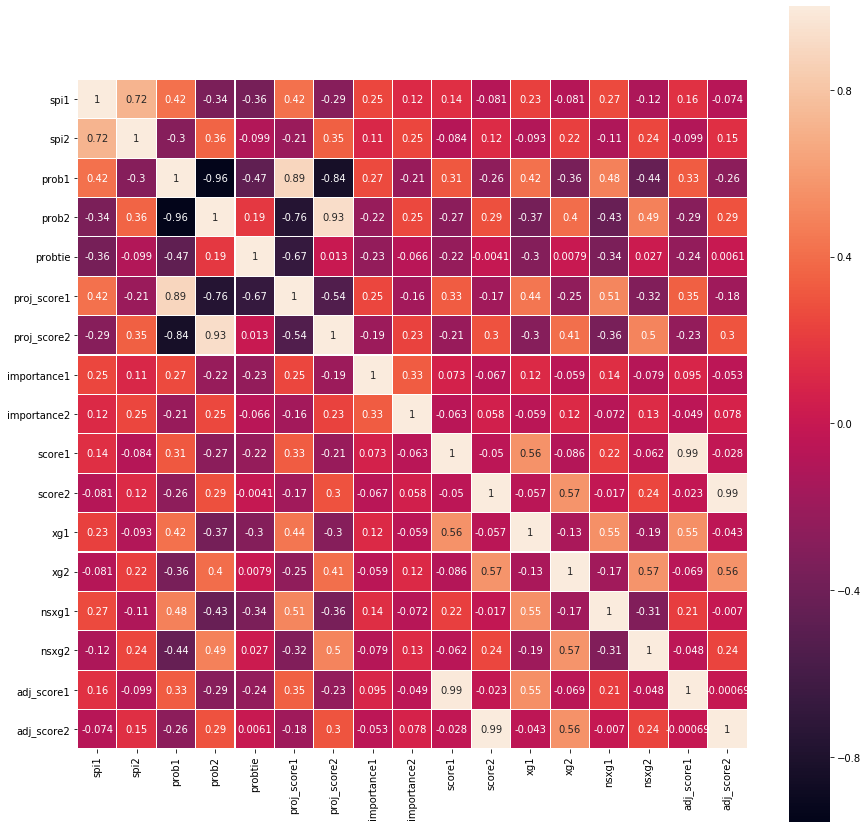

In [4]:
DF_corr =DF.drop(['date' , 'league_id' , 'league', 'team1','team2'], axis = 1)
fig, ax = plt.subplots(figsize=(15,15)) 
cor = DF_corr.corr()
sns.heatmap(cor, square = True, linewidths=0.1, annot=True, ax=ax)
plt.show()

The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column and it is another way to do the visualization.

C:\Users\a454g185\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\a454g185\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


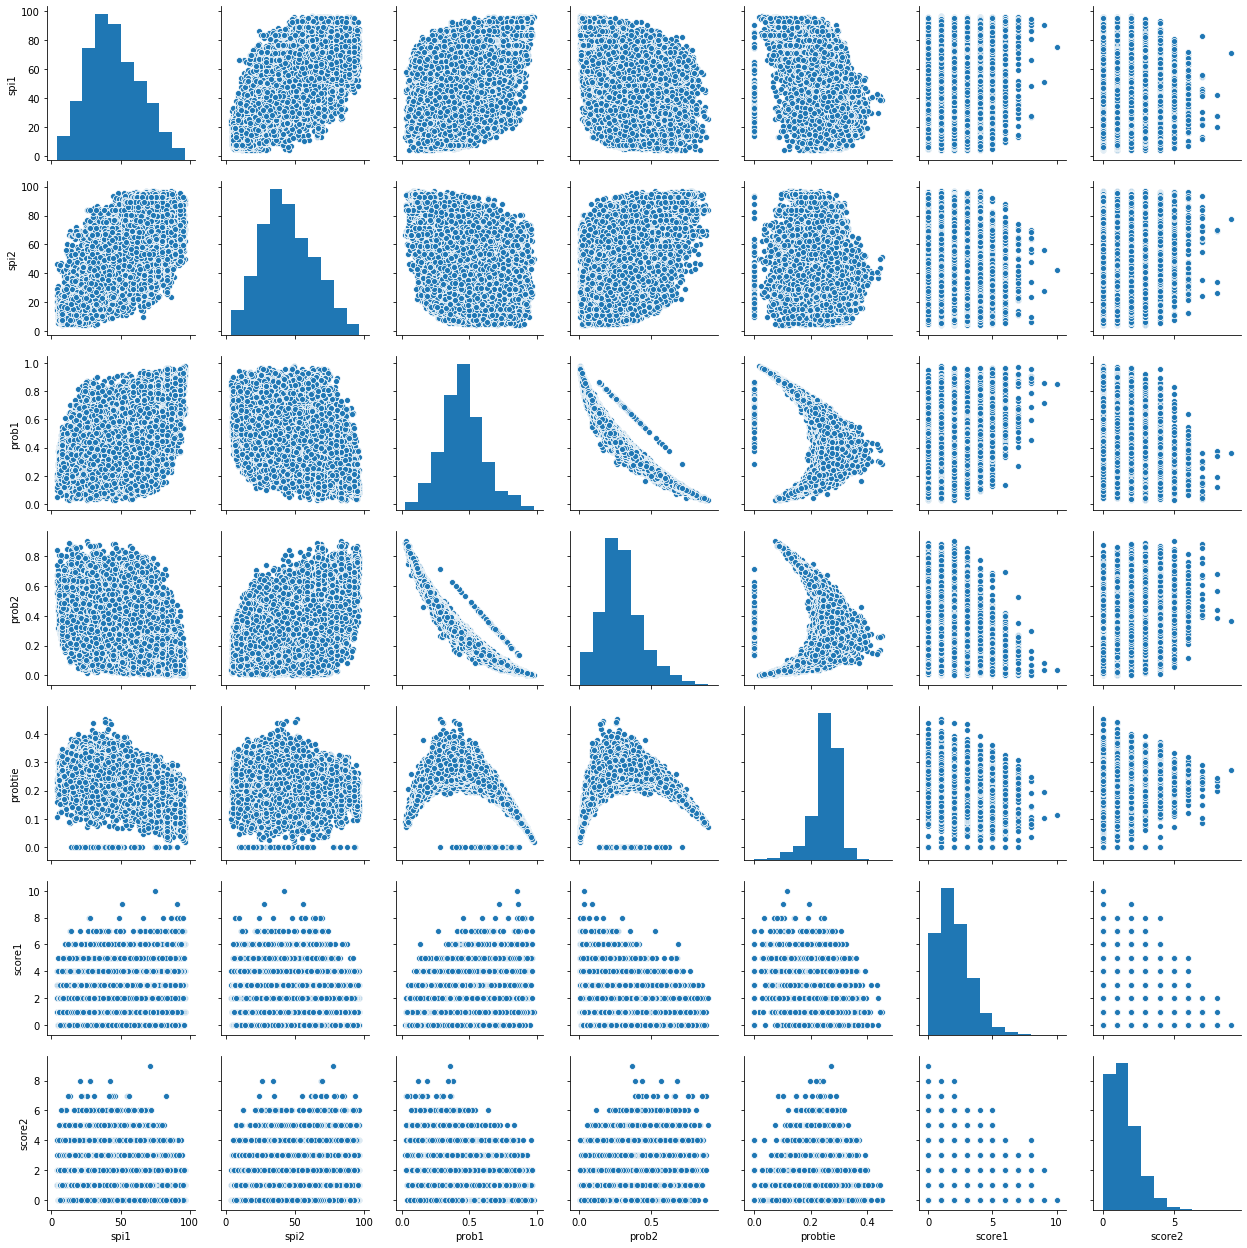

In [5]:
sns.pairplot(DF , vars=["spi1", "spi2" , "prob1" , "prob2" , "probtie" , "score1" , "score2"] )
plt.show()

Also, the line plot can be used to compare two different columns which are related to each other.

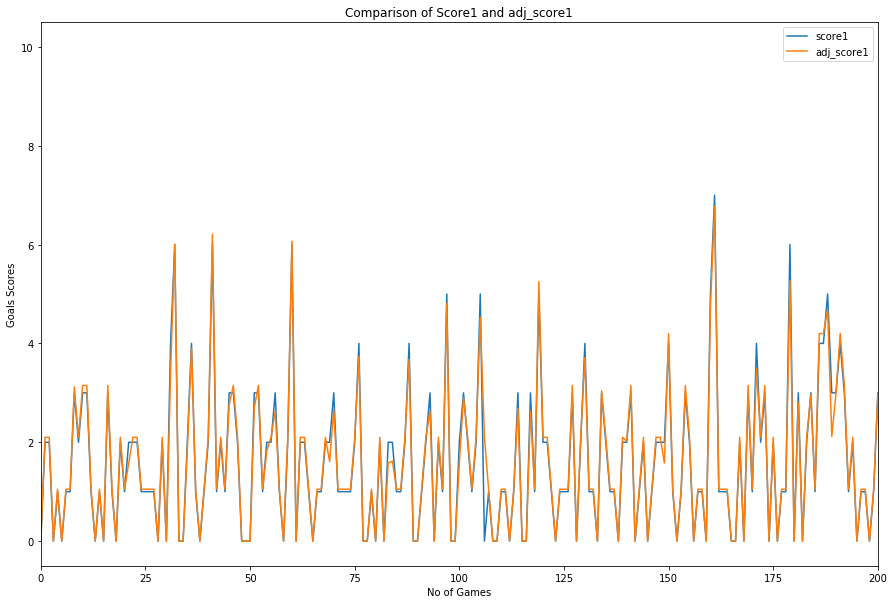

In [6]:
DF.plot(y=["score1","adj_score1"] , figsize=(15,10))
plt.xlim(0,200)
plt.ylabel("Goals Scores")
plt.xlabel("No of Games")
plt.title("Comparison of Score1 and adj_score1")
plt.show()
plt.show()

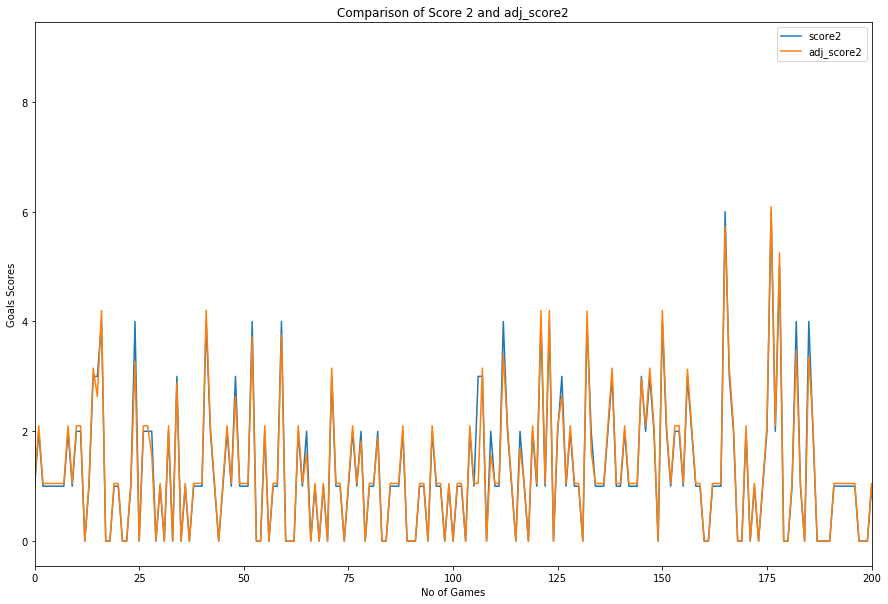

In [7]:
DF.plot(y=["score2","adj_score2"] , figsize=(15,10))
plt.xlim(0,200)
plt.xlabel("No of Games")
plt.ylabel("Goals Scores")
plt.title("Comparison of Score 2 and adj_score2")
plt.show()


## Feature Engineering

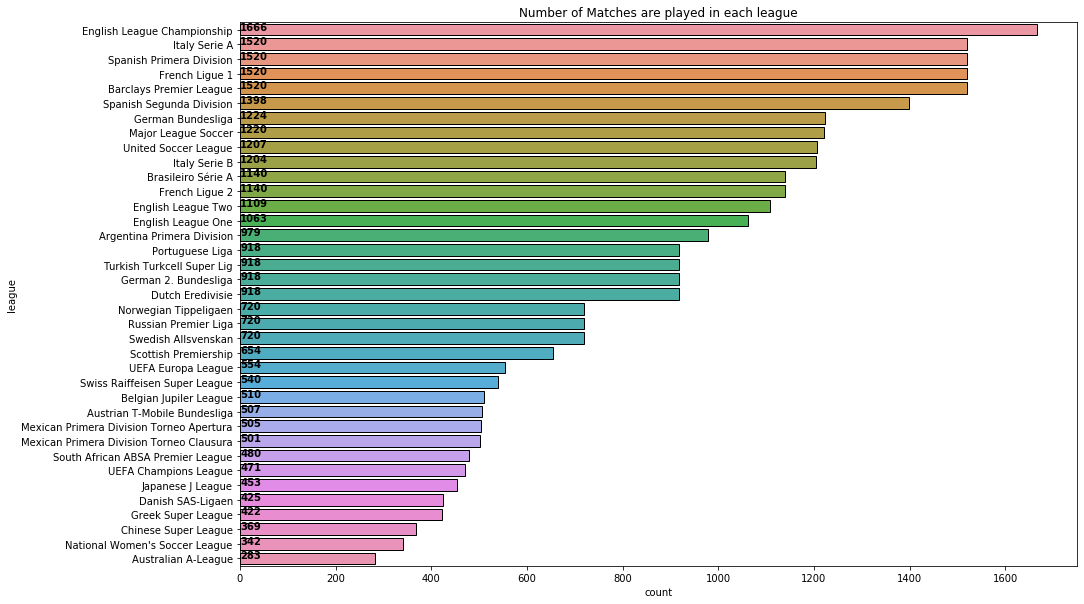

In [8]:
plt.figure(figsize=(15,10))
ax = sns.countplot(y = DF["league"],
                   order=DF["league"].value_counts().index,
                   linewidth = 1,
                   edgecolor = "k"*DF["league"].nunique()
                 )
for i,j in enumerate(DF["league"].value_counts().values):
    ax.text(1,i,j,weight = "bold")
plt.title("Number of Matches are played in each league")
plt.show()

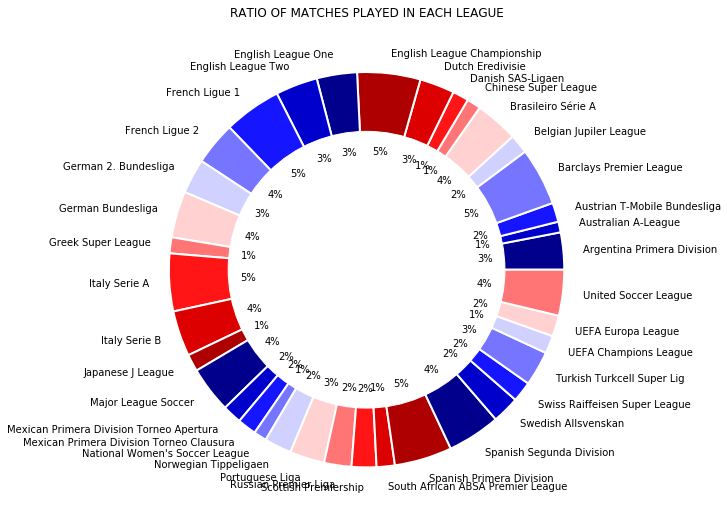

In [9]:
plt.figure(figsize=(10,20))
plt.subplot(211)
DF["total_goal"] = DF["score1"]+DF["score2"]
agg = DF.groupby(["league"]).agg({"league_id":"count","total_goal":"sum"})
agg["league_id"].plot.pie(colors=sns.color_palette("seismic",10),
                             autopct="%1.0f%%",
                             wedgeprops={"linewidth":2,"edgecolor":"white"})
plt.ylabel("")
my_circ = plt.Circle((0,0),.7,color ="white")
plt.gca().add_artist(my_circ)
plt.title("RATIO OF MATCHES PLAYED IN EACH LEAGUE")
plt.show()

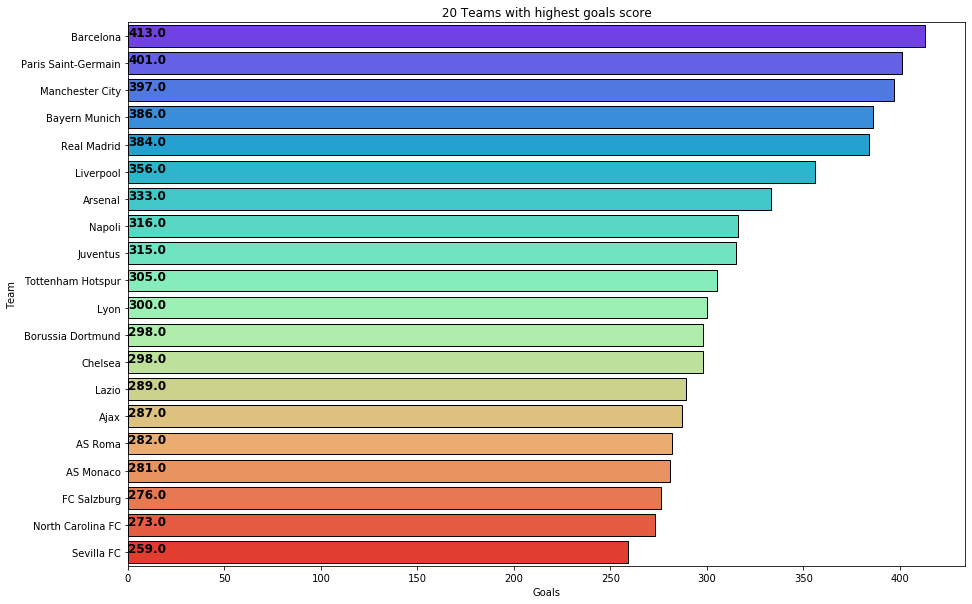

In [10]:
Home_Team = DF.groupby("team1")["score1"].sum().reset_index()
Away_Team = DF.groupby("team2")["score2"].sum().reset_index()
Home_Team = Home_Team.sort_values(by="team1",ascending= False)
Away_Team = Away_Team.sort_values(by="team2",ascending= False)
HT = Home_Team
HT = HT.rename(columns={'team1':"Team", 'score1':"Goals"})
AT = Away_Team
AT = AT.rename(columns={'team2':"Team", 'score2':"Goals"})
Goals = pd.concat([HT,AT])
Goals = Goals.groupby("Team")["Goals"].sum().reset_index().sort_values(by = "Goals",ascending = False)
plt.figure(figsize=(15,10))
ax = sns.barplot(x="Goals",y="Team",
                  data=Goals[:20],palette="rainbow",
                 linewidth = 1,edgecolor = "k"*20)
for i,j in enumerate(Goals["Goals"][:20]):
    ax.text(.3,i,j,weight="bold",color = "k",fontsize =12)
plt.title(" 20 Teams with highest goals score ")
plt.show()

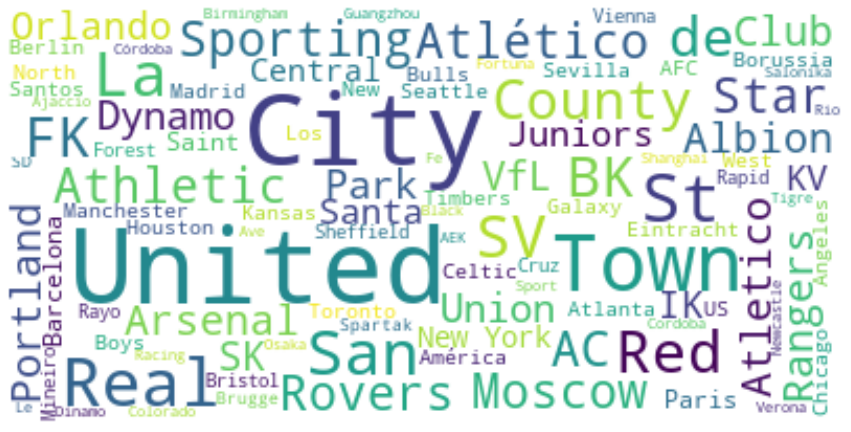

In [11]:
text = " ".join(line for line in Goals.Team)
stopwords = set(STOPWORDS)
stopwords.update(["FC", "II", "FF" ,"IFK" , "SC"])

wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


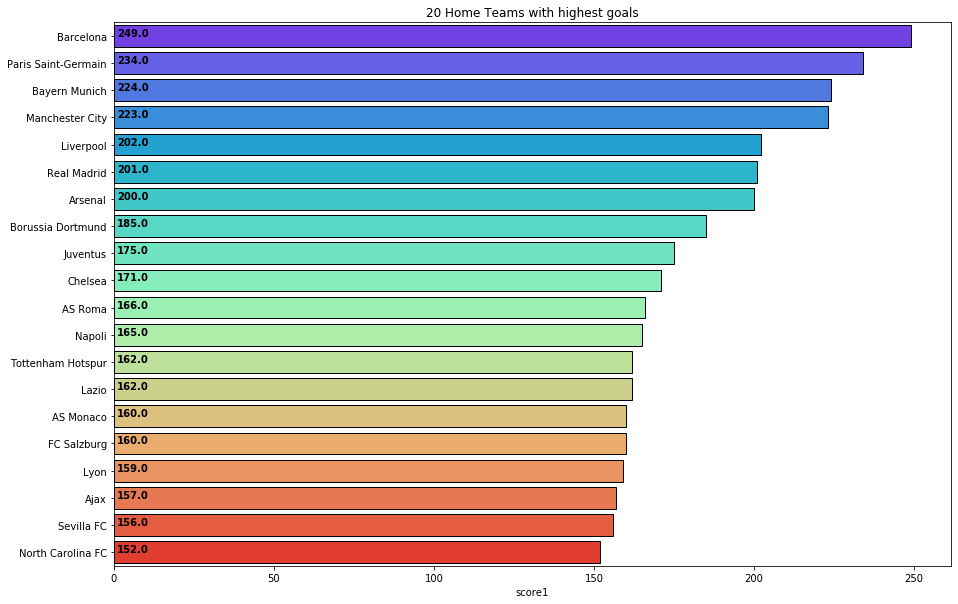

In [12]:
Home_Team = Home_Team.sort_values(by="score1",ascending= False)
plt.figure(figsize=(15,10))
ax = sns.barplot(y="team1",x="score1",
                 data=Home_Team[:20],palette="rainbow",
                 linewidth = 1,edgecolor = "k"*20)
plt.ylabel('')
plt.title("20 Home Teams with highest goals")
for i,j in enumerate(Home_Team["score1"][:20]):
    ax.text(1,i,j,weight = "bold")

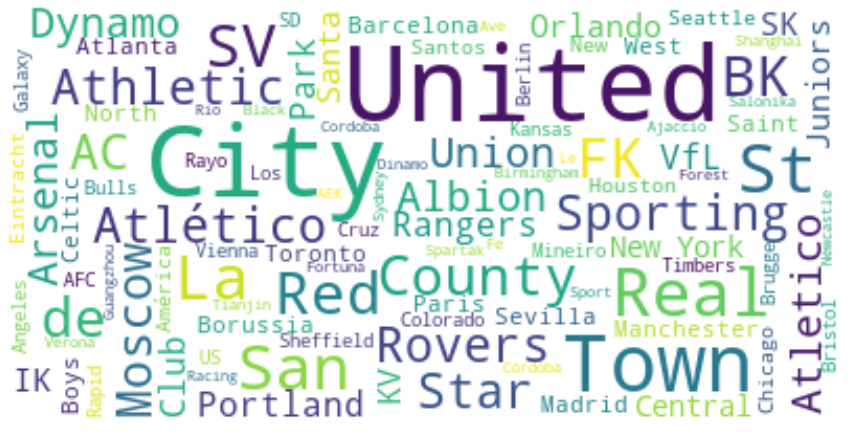

In [13]:
text = " ".join(line for line in Home_Team.team1)
stopwords = set(STOPWORDS)
stopwords.update(["FC", "II", "FF" ,"IFK" , "SC"])

wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

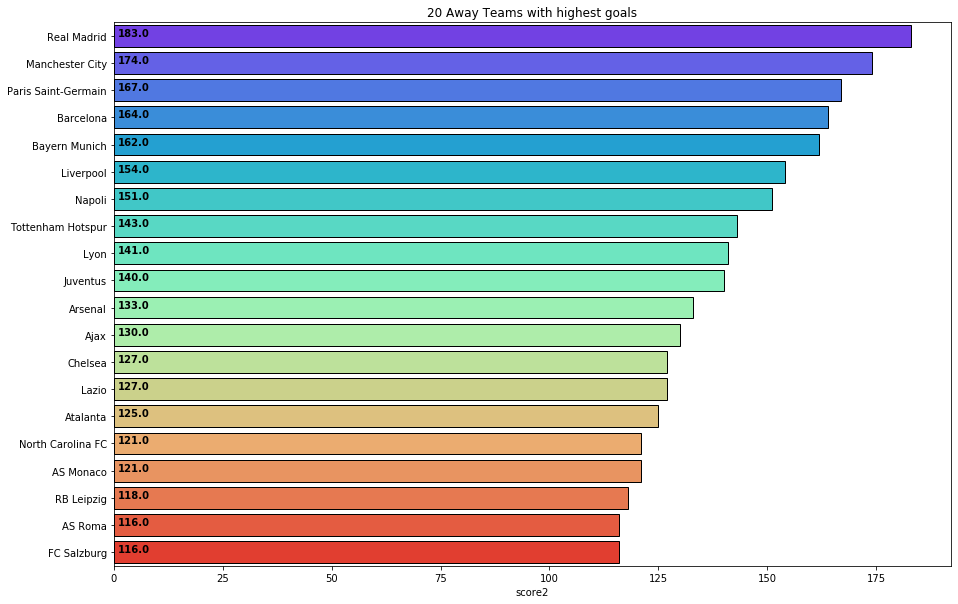

In [14]:
Away_Team = Away_Team.sort_values(by="score2",ascending= False)
plt.figure(figsize=(15,10))
ax = sns.barplot(y="team2",x="score2",
                 data=Away_Team[:20],palette="rainbow",
                 linewidth = 1,edgecolor = "k"*20)
plt.ylabel('')
plt.title("20 Away Teams with highest goals")
for i,j in enumerate(Away_Team["score2"][:20]):
    ax.text(1,i,j,weight = "bold")

C:\Users\a454g185\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


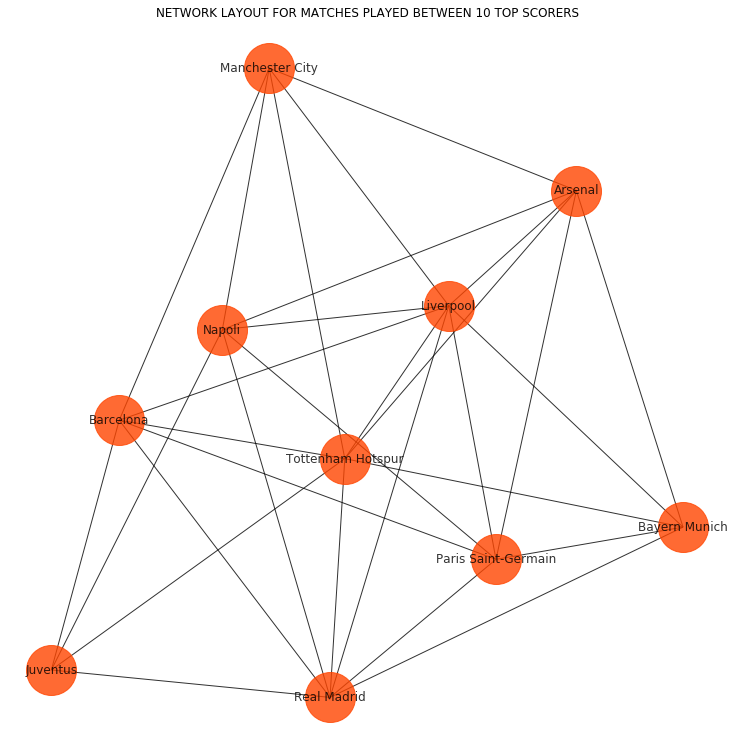

In [15]:
ts = list(Goals["Team"][:10])
v =DF[["team1","team2"]]
v = v[(v["team1"].isin(ts)) & (v["team2"].isin(ts))]

import networkx as nx

g = nx.from_pandas_edgelist(v,"team1","team2")
fig = plt.figure(figsize=(10,10))

nx.draw_kamada_kawai(g,with_labels =True,node_size =2500,node_color ="Orangered",alpha=.8)
plt.title("NETWORK LAYOUT FOR MATCHES PLAYED BETWEEN 10 TOP SCORERS")
fig.set_facecolor("white")

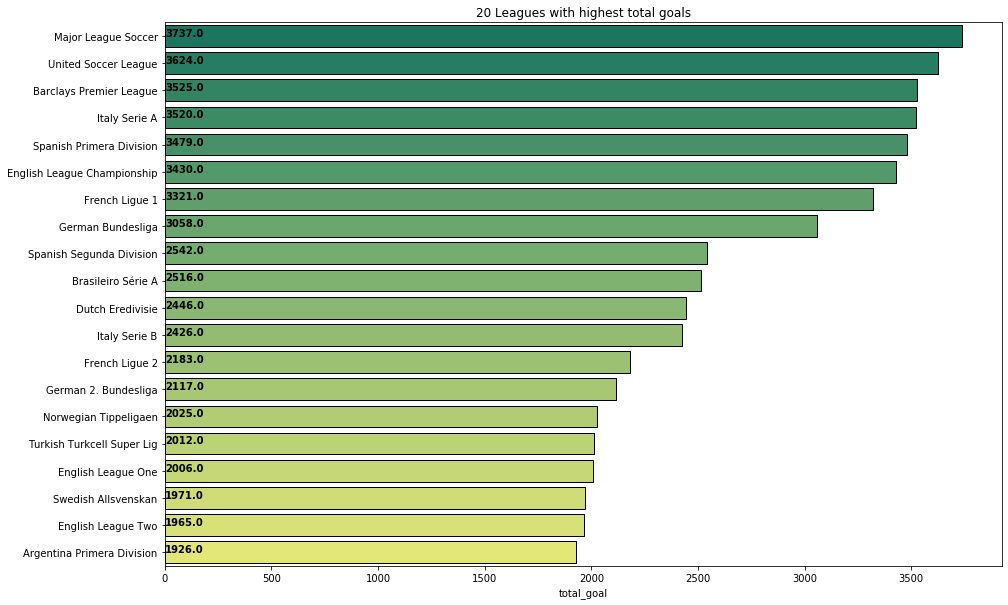

In [16]:
TG = DF.groupby("league")["total_goal"].sum().reset_index()
TG = TG.sort_values(by = "total_goal", ascending = False)
plt.figure(figsize=(15,10))
ax = sns.barplot(y="league",x="total_goal",
                 data=TG[:20],palette="summer",
                 linewidth = 1,edgecolor = "k"*20)
plt.ylabel('')
plt.title("20 Leagues with highest total goals")
for i,j in enumerate(TG["total_goal"][:20]):
    ax.text(1,i,j,weight = "bold")


In [17]:
TG

,league,total_goal
20,Major League Soccer,3737.0
36,United Soccer League,3624.0
3,Barclays Premier League,3525.0
17,Italy Serie A,3520.0
29,Spanish Primera Division,3479.0
9,English League Championship,3430.0
12,French Ligue 1,3321.0
15,German Bundesliga,3058.0
30,Spanish Segunda Division,2542.0
5,Brasileiro Série A,2516.0


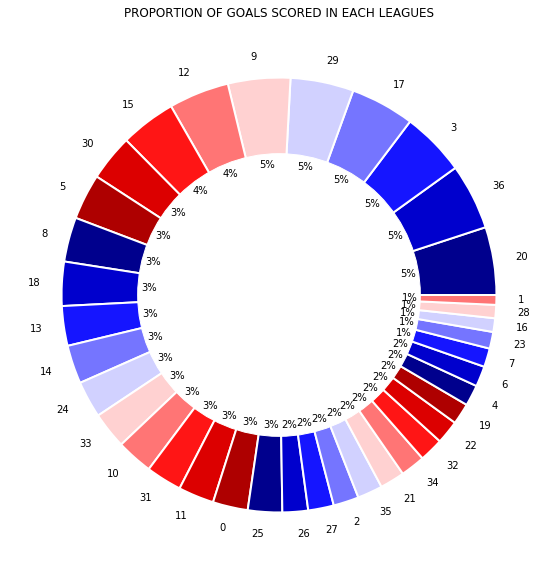

In [20]:
plt.figure(figsize=(15,10))
TG["total_goal"].plot.pie(colors=sns.color_palette("seismic",10),
                           autopct="%1.0f%%",
                           wedgeprops={"linewidth":2,"edgecolor":"white"})
plt.ylabel("")
my_circ = plt.Circle((0,0),.65,color ="white")
plt.gca().add_artist(my_circ)
plt.title("PROPORTION OF GOALS SCORED IN EACH LEAGUES")
plt.show()

## Conclusion

This was a good dataset to do the visualization and also there are lots of thinhs that we can do to add the additional value to this dataset.